## <font color=darkblue> Optimization using second order gradient descent </font>


In this notebook, we provide an **overview of second order gradient-based optimization algorithms**. Supervised learning applications are usually based on the minimization of an objective function on $\mathbb{R}^d$ (kernel based SVM models, penalized regression, maximum likelihood estimation of neural networks) and accelerated gradient methods are the go-to solutions to solve these optimization problems.

The results provided in this notebook are valid with assumptions on the target functions such as convexity or strong convexity (some of them may be relaxed). Although these algorithms are widely used, keep in mind that these assumptions do not hold in practice and that  non-convexity stems from the arbitrary form of the loss functions used in machine learning.

This also motivate **alternative methods such as evolutionary approaches for difficult non-linear non-convex optimisation problems** in continuous and discrete domains (for instance the CMA-ES algorithm).

### <font color=darkred> Bibliography & additional ressources </font>

- [1] Convex Optimization, S. Boyd & L. Vandenberghe, 2009, https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
``Very complete book on convex optimization and gradient descent algorithms (full gradient, Newton's method, constrained problems)``
, etc.
- [2] Convex Optimization: Algorithms and
Complexity, S. Bubeck, 2015, https://arxiv.org/pdf/1405.4980.pdf

-  [3] Probabilistic machine learning: an introduction, Kevin P. Murphy, 2022, https://probml.github.io/pml-book/book1.html
``Full book online with all basics on machine learning. Not state-of-the-art but very good introduction``

- [4] Learning theory from first principles, F. Bach, 2023, https://www.di.ens.fr/~fbach/ltfp_book.pdf
``Much more advanced reference, Chapter 5 on optimization``

- [5] Algorithms for optimization, M. J. Kochenderfer and T. A. Wheeler, 2019.


### <font color=darkred>Introduction : general framework & motivations</font>

In machine learning applications, parameter inference often boils down to solving $\mathrm{argmin}_{\theta \in \mathbb{R}^d} \,\{f(\theta)=\frac 1n \sum_{i=1}^n \ell(\theta, y_i, x_i) + \lambda \mathrm{pen}(\theta)\}$, with $\lambda>0$, $\mathrm{pen}(\cdot)$ some penalization function and $(x_i,y_i)_{1\leq i\leq n}$ are ``training examples of inputs and outputs`` (in a supervised setting), and $\theta$ is an ``unknown parameter to be estimated.``

In this notebook, we do not focus on machine learning applications and **consider a generic target function $f: \mathbb{R}^d\to \mathbb{R}$**.

In [ ]:
!pip install autograd-minimize

In [2]:
import numpy as np
import autograd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

np.set_printoptions(precision=2)
plt.rcParams.update(
    {
        "font.size": 25,
        "figure.figsize": (14, 7),
        "axes.grid": True,
        "grid.color": "#93a1a1",
        "grid.alpha": 0.3,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)

#### Simple cost function to test the algorithms

We may consider the Booth and Rozenbrock functions, see fo instance [5], to test the optimization procedures presented in this session:
$$
f_{\mathrm{booth}} : (x_1,x_2) \mapsto (x_1+2x_2-7)^2 + (2x_1+x_2-5)^2
$$
and
$$
f_{\mathrm{roz}} : (x_1,x_2) \mapsto (1-x_1)^2 + 100(x_2-x_1^2)^2\,.
$$


<font color=darkred>Write the Booth and Rozenbrock functions</font>

In [17]:
def rozenbrock(x):
    x1 = x[0]
    x2 = x[1]
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

def booth(x, y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

### <font color=darkred> Newton's method </font>

Let $\theta_k$ be the current parameter estimate. We consider the second order Taylor expansion of the target $f$. 

More precisely, this approach proposes to locally **approximate the function $f$ around $\theta_k$ by a second-order Taylor expansion**.


In the case where $\nabla^2 f(\theta_k)$ is definite positive, the function
$$
\theta\mapsto f(\theta_k) + \theta^\top\nabla f(\theta_k) + \frac{1}{2}\theta^\top\nabla^2  f(\theta_k)\theta
$$
admits a unique minimum at 
$$
\theta_* = -(\nabla^2 f(\theta_k))^{-1}\nabla f(\theta_k)\,.
$$
This motivates the following iterative algorithm:
$$
\theta_{k+1} = \theta_k - (\nabla^2 f(\theta_k))^{-1}\nabla f(\theta_k)\,.
$$

###### **Implementation from scratch**

In [4]:
import autograd.numpy as np
import autograd

<font color=darkred>Write a function ``NR_update`` which performs one update of the parameter using Newton-Raphson approach</font>

<font color=darkred>Write a complete loop performing the optimization with Newton-Raphson approach</font>

In [23]:
def NR_update(f, x):
    # Compute Jacobian and Hession matrices
    J = autograd.jacobian(f)(x)
    H = autograd.hessian(f)(x)
    # Compute the update
    x_new = x - np.linalg.inv(H) @ J
    return x_new   


In [27]:
def NR_loop(f , x0, iterations = 50):
    """Compute iterative Newton updates.
    
    Parameters
    ----------
    f:
        Function to be optimized.
    x0: 
        Initial parameter estimate.
    iterations:
        Number of updates.
    
    Returns
    -------
    params:
        Estimators
    loglik:
        History of likelihood along iterations.
    """
    # Initialize the parameter estimates
    params = x0.astype(float)
    # Initialize the loglikelihood history
    loglik = []
    
    # Iterate
    for _ in range(iterations):
        params = NR_update(f, params)
        loglik.append(f(params))
    return params, loglik

In [30]:
# Test the function
x0 = np.array([-10, 12])
params, loglik = NR_loop(rozenbrock, x0, iterations=50)
print("Final parameters:", params)
print("Final loglikelihood:", loglik)


Final parameters: [1. 1.]
Final loglikelihood: [120.98625117180146, 1463310.0112622394, 7.380973287587683e-07, 5.4478766663523007e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<font color=darkred>- Compute the gradient and the Hessian of the Rozenbrock function. </font>

<font color=darkred>- Write an iteration of the Newton update for this function
$$
f_{\mathrm{roz}} : (x_1,x_2) \mapsto (1-x_1)^2 + 100(x_2-x_1^2)^2\,.
$$</font>

The gradient is given by
$$
\nabla f_{\mathrm{roz}} (x_1,x_2) = \begin{pmatrix} -2(1-x_1) - 400x_1(x_2-x_1^2) \\ 200(x_2-x_1^2)\end{pmatrix}
$$
and the Hessian matrix by
$$
\nabla^2 f_{\mathrm{roz}} (x_1,x_2) = \begin{pmatrix} 2 - 400x_2 + 1200x^2_1 & -400x_1 \\ -400 x_1 & 200\end{pmatrix}
$$

This provides the following iterative algorithm:
$$
\theta_{k+1} = \theta_k - \begin{pmatrix} 2 - 400\theta_k(2) + 1200\theta^2_k(1) & -400\theta_k(1) \\ -400 \theta_k(1) & 200\end{pmatrix}^{-1}\begin{pmatrix} -2(1-\theta_k(1)) - 400\theta_k(1)(\theta_k(2)-\theta^2_k(1)) \\ 200(\theta_k(2)-\theta^2_k(1))\end{pmatrix}\,.
$$

###### **Convergence**

Assume that the target function $f$ is convex and twice differentiable. Assume also that:
- $\nabla f$ is $L$-Lipschitz and $\nabla^2 f$ is $M$-Lipschitz ;
- $f$ is strongly convex with parameter $m$.

Then, there exists a constant $c$, for all $k>0$,
$$
f(x_{k+k_0}) - f(x_*) \leq c \left(1/2\right)^{2^k}\,,
$$
where $k_0$ is the number of steps until $\|\nabla f(x_{k_0+1})\|$ is below a fixed threshold.

**Locally, the method is quadratically convergent**, that is, there exists $c>0$, such that if $\|x_k –x_*\|\leq c$, then $\|x_{k+1} –x_*\|/c\leq (\|x_k –x_*\|/c)^2$. Thies yields
$$
\|x_k –x_*\|⩽c(\|x_{k_0} –x_*\|/c)^{2^{k-k_0}},
$$
where $k_0$ is such that $\|x_k –x_*\|\leq c$.

Newton's method is **sensitive to initial conditions**, in particular for non-convex objective functions. 

Newton’s method is **very computationally intensive**. The computation of the inverse Hessian scales as **$O(d^3)$** which is prohibitive in high dimensional settings.

###### **Built-in optimization**

<font color=darkred> Use ``minimize`` from ``autograd_minimize`` to optimize the target function </font> 

### <font color=darkred> Quasi Newton - Broyden-Fletcher-Goldfarb-Shanno (BFGS) method</font>

Newton's method has a fast rate of local convergence (quadratic). Started in a neighborhood of the solution, convergence occurs in just a few iterations.

Computation of the Hessian matrix is sometimes **intractable or computationally very sensitive**. Quasi-Newton approaches propose to use an update similar to the Newton Raphson algorithm with an approximation of the Hessian, i.e.
$$
\theta_{k+1} = \theta_k - \gamma_k A_k^{-1}\nabla f(\theta_k)\,.
$$

In this framework, $A_k$ aims at approximating $\nabla^2 f(\theta_k)$. This approximation satisfies in general the quasi-Newton condition:
$$
A_{k+1}(\theta_{k+1} - \theta_k) = \nabla f(\theta_{k+1}) - \nabla f(\theta_{k})\,.
$$

This constraint is motivated by:
$$
\nabla f (x + p) =  \nabla f (x) + \nabla^2 f (x)p + \int_0^1 \left\{\nabla^2f (x + t p) − \nabla^2 f (x)\right\}p dt\,.
$$
Applying this formula with $x = \theta_k$ and $p = \theta_{k+1}-\theta_k$ yields
$$
\nabla f (\theta_{k+1}) =  \nabla f (\theta_{k}) + \nabla^2 f (\theta_{k})\left\{\theta_{k+1}-\theta_k\right\} +o\left(\|\theta_{k+1}-\theta_k\|\right)\,.
$$

The quasi-Newton condition  **is underdetermined**. To determine a tractable scheme  weneed to impose additional constraints.
A solution to build $A_{k+1}$ is to solve:
$$
A\in\mathrm{Argmin}_{A^\top =A; A(\theta_{k+1} - \theta_k) = \nabla f(\theta_{k+1}) - \nabla f(\theta_{k})}\|A-A_k\|\,.
$$
Solving this constrained optimization problem (for the inverse $A^{-1}$) yields the following scheme.

In the BFGS setting, the approximation of the Hessian matrix is computed recursively as follows.
- $\delta_k = \theta_{k+1}-\theta_k$.
- $d_k = \nabla f(\theta_{k+1}) -\nabla f(\theta_k)$. 
- $A_{k+1} = A_k + \left(d_k^\top \delta_k\right)^{-1}d_kd_k^\top - \left(\delta_k^\top A_k\delta_k\right)^{-1}A_k\delta_k(A_k\delta_k)^\top$. 

Using **Woodbury formula**, we can directly compute $A_{k+1}^{-1}$ as follows.
\begin{align*}
\alpha_k &= (d_k^\top \delta_k)^{-1}\,,\\
A_{k+1}^{-1} &= \left(I - \alpha_k \delta_k d_k^\top\right)A_{k}^{-1}\left(I - \alpha_k d_k\delta_k^\top\right) + \alpha_k \delta_k \delta_k^\top
\end{align*}

<font color=darkred> Implement a complete loop of the proposed BFGS method </font>


In [34]:
import numpy as np
import autograd.numpy as anp
from autograd import jacobian

# Naive BFGS algorithm with constant stepsize
# See https://github.com/trsav/bfgs
def BFGS_naive(func, x0, iterations = 50, stepsize = 0.01):
    """
    Parameters
    ----------
    func:
        Function to be optimised. 
    x0:
        Starting point.
    iterations: 
        Number of iterations.

    Returns
    ------- 
    Parameter estimate. 
    """
    # Initialize the parameter estimates
    x_new = x0.astype(float)
    Ak = np.eye(len(x0))  # Initial Hessian approximation (identity matrix)
    history = [x_new.copy()]  # To store the parameter estimates at each iteration

    for _ in range(iterations):
        # Compute the gradient at the current point
        grad = jacobian(func)(x_new)
        
        # Compute the search direction
        pk = -np.linalg.inv(Ak).dot(grad)
        
        # Update the parameters
        x_old = x_new
        x_new = x_new + stepsize * pk
        
        # Compute the differences
        deltak = x_new - x_old
        dk = jacobian(func)(x_new) - jacobian(func)(x_old)
        
    # Update the Hessian approximation
        if deltak.T @ dk != 0:  # Avoid division by zero
            Ak = Ak + (np.outer(dk, dk) / (dk.T @ deltak)) - \
                 (Ak @ np.outer(deltak, deltak) @ Ak) / (deltak.T @ Ak @ deltak)
        
    # Store the current parameter estimate
    history.append(x_new.copy())

    return x_new, history

###### **Line search**

Each iteration of a line search method decides the step-size $\gamma_k$ i.e. the **amplitude of the update**. The iteration is given by
$$
\theta_{k+1} = \theta_{k} + \gamma_k p_k\,,
$$
where $p_k = - A_k^{-1}\nabla f(\theta_k)$.

Most line search algorithms require $p_k$ to be a descent direction:
$$
p_k^\top \nabla f(\theta_k) <0\,.
$$

Choosing $A_k$ as the identity matrix yields first order optimization algorithms, while in Newton’s method, $A_k$ is the exact Hessian matrix.

The ideal choice of the step-size is the global minimizer of $\alpha \mapsto f(\theta_k + \alpha p_k)$ which is computationally intractable.

Computing the step length $\gamma_k$ amounts to solving a tradeoff between decreasing the value of $f$ and not spending too much time at each iteration.

A popular line search condition targets to choose $\gamma_k$ such that:
$$
f(\theta_k + \gamma_kp_k ) \leq f (\theta_k ) + c_1 \gamma_k \nabla f(\theta_k)^\top p_k\,,
$$
for $p_k = -A_k^{-1}\nabla f(\theta_k)$ some constant $0<c_1<1$.

A second requirement to avoid too short steps requires that
$$
\nabla f(\theta_k + \gamma_k p_k )^\top
p_k \geq c_2 \nabla f(\theta_k)^\top p_k
$$
where $c_1<c_2<1$.

###### **Implementation from scratch**

<font color=darkred>Write a ``line_search`` function which computes the best step-size iteratively </font>


In [47]:
def line_search(func,x,p,nabla, alpha: float = 0.3, beta: float = 0.8):
    """
    Parameters
    ----------
    f:
        Function to be optimized.
    x:
        Current parameter estimate.
    p:
        Current value of `p`.
    nabla:
        Current value of the gradient. 
    
    Returns
    -------
    The step-size gamma.
    """
    gamma = 1.0  # Initial step size

    # Armijo condition: f(x + gamma * p) <= f(x) + alpha * gamma * nabla.T @ p
    while func(x + gamma * p) > func(x) + alpha * gamma * np.dot(nabla, p):
        gamma *= beta  # Reduce step size

    return gamma

<font color=darkred>Write a complete BFGS method using line search to select the step-size at each iteration </font>


In [37]:
def BFGS_loop(func: callable, x0: np.ndarray, iterations: int) -> np.ndarray:
    """
    Parameters
    ----------
    func:
        Function to be optimised. 
    x0:
        Starting point.
    iterations: 
        Number of iterations.

    Returns
    ------- 
    Parameter estimate. 
    """
    # Initialize variables
    x_new = x0.astype(float)  # Ensure x0 is float
    Ak = np.eye(len(x0))  # Initial Hessian approximation (identity matrix)
    history = [x_new.copy()]  # To store parameter estimates at each iteration

    for _ in range(iterations):
        # Compute the gradient at the current point
        grad = jacobian(func)(x_new)
        
        # Compute the search direction
        p = -np.linalg.inv(Ak).dot(grad)
        
        # Perform line search to find the step-size
        gamma = line_search(func, x_new, p, grad)
        
        # Update the parameters
        x_old = x_new
        x_new = x_new + gamma * p
        
        # Compute the differences
        deltak = x_new - x_old
        dk = jacobian(func)(x_new) - jacobian(func)(x_old)
        
        # Update the Hessian approximation
        if deltak.T @ dk != 0:  # Avoid division by zero
            Ak = Ak + (np.outer(dk, dk) / (dk.T @ deltak)) - \
                 (Ak @ np.outer(deltak, deltak) @ Ak) / (deltak.T @ Ak @ deltak)
        
        # Store the current parameter estimate
        history.append(x_new.copy())

    return x_new, history

###### **Built-in optimization**

###### **Comparison with first order methods**

In this section we compare second order approaches with first order optimization methods such as the **full gradient descent** and **Nesterov accelerated algorithm**.

<font color=darkred>Compare these second order approaches to full gradient and Nesterov accelerated optimizers </font>


In [44]:
def gradient_descent(f, nabla, w0, iterations, step_size):
    loss_history = []
    w = w0.copy()
    for k in range(iterations):
        w = w - step_size * nabla(w)
        loss_history.append(f(w))
    return w, loss_history

In [45]:
def nesterov_gd(f, nabla, w, iterations, step_size, beta):
    loss_history = []
    v = w.copy()
    for k in range(iterations):
        v_new = w - step_size * nabla(w)
        w = v + beta * (v_new - v)
        v = v_new
        loss_history.append(f(w))
    return w, loss_history

In [42]:
import numpy as np
import autograd.numpy as anp
from autograd import grad, jacobian

def rosenbrock(x):
    x1 = x[0]
    x2 = x[1]
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

rosenbrock_grad = grad(rosenbrock)

def compare_methods():
    x0 = np.array([-1.2, 1.0])  # Point de départ
    iterations = 50
    step_size = 0.001
    beta = 0.9

    # Descente de gradient classique
    gd_params, gd_loss = gradient_descent(rosenbrock, rosenbrock_grad, x0, iterations, step_size)

    # Descente de gradient accélérée de Nesterov
    nesterov_params, nesterov_loss = nesterov_gd(rosenbrock, rosenbrock_grad, x0, iterations, step_size, beta)

    # BFGS
    bfgs_params, bfgs_loss = BFGS_loop(rosenbrock, x0, iterations)

    # Affichage des résultats
    print("Gradient Descent Final Parameters:", gd_params)
    print("Nesterov Final Parameters:", nesterov_params)
    print("BFGS Final Parameters:", bfgs_params)

    # Tracé des courbes de convergence
    import matplotlib.pyplot as plt
    plt.plot(gd_loss, label="Gradient Descent")
    plt.plot(nesterov_loss, label="Nesterov")
    plt.plot([rosenbrock(x) for x in bfgs_loss], label="BFGS")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Comparison of Optimization Methods")
    plt.show()

Gradient Descent Final Parameters: [-0.99  0.99]
Nesterov Final Parameters: [-0.99  1.  ]
BFGS Final Parameters: [1. 1.]


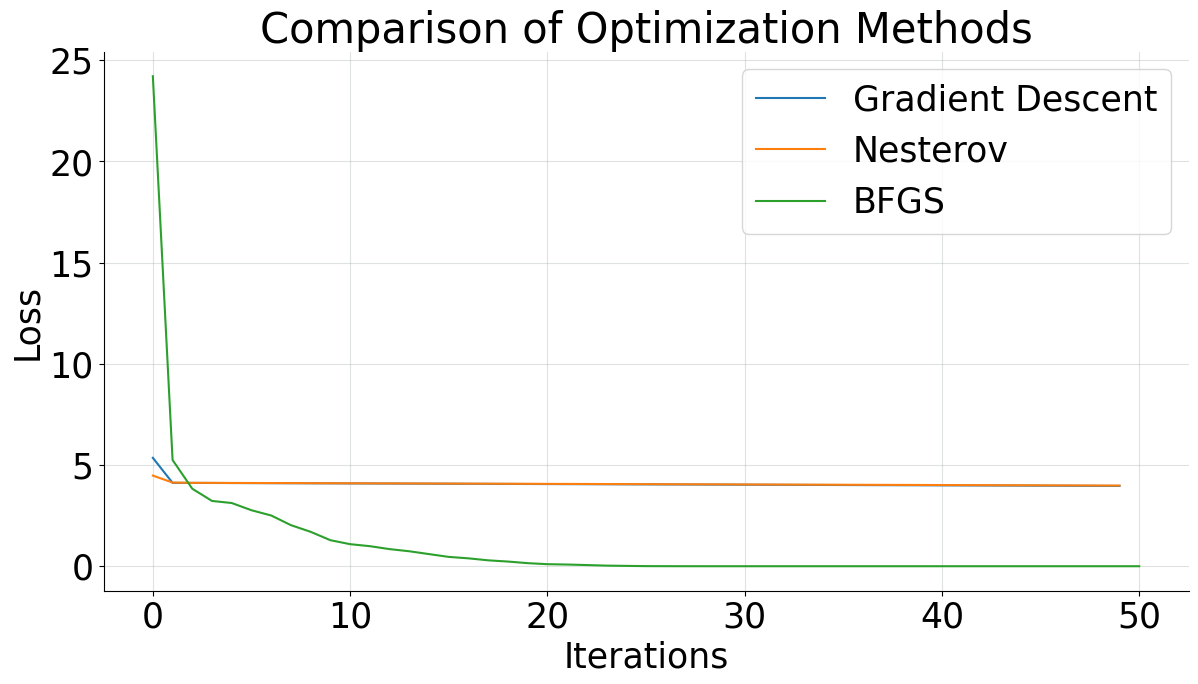

In [48]:
compare_methods()

### **To sum-up**

- **Newton**
- Appropriate when the target is stricly convex.
- Very expensive, $O(d^3)$ to compute inverse of the Hessian matrix.

- **Quasi-Newton**
- Iteratively builds up approximations of the Hessian matrix.
- Popular method to train deep networks.



### <font color=darkred>Appendix: optimization with Scipy</font>

From https://docs.scipy.org/doc/scipy/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs

In [49]:
from scipy.optimize import minimize

In [50]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [51]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [52]:
x0 = np.random.rand(5)

res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 44
         Gradient evaluations: 44


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.287659622579665e-14
        x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
      nit: 36
      jac: [ 1.461e-07 -4.486e-06  1.150e-06  2.925e-07  1.113e-07]
 hess_inv: [[ 7.500e-03  1.242e-02 ...  4.667e-02  9.312e-02]
            [ 1.242e-02  2.471e-02 ...  9.275e-02  1.851e-01]
            ...
            [ 4.667e-02  9.275e-02 ...  3.745e-01  7.470e-01]
            [ 9.312e-02  1.851e-01 ...  7.470e-01  1.495e+00]]
     nfev: 44
     njev: 44